In [16]:
import numpy as np
import pandas as pd

np.random.seed(42)

# Simulate time points
n_points = 500
time = pd.date_range(start='2022-01-01', periods=n_points)

# Create varying volatility: low, high, low, high
volatility_pattern = np.tile([1, 5], (n_points // 2) + 1)[:n_points]
noise = np.random.randn(n_points) * volatility_pattern

# Base series (random walk + noise)
series = np.cumsum(np.random.randn(n_points)) + noise

df = pd.DataFrame({'timestamp': time, 'value': series})
df.set_index('timestamp', inplace=True)

In [17]:
volatility_pattern

array([1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,

In [18]:
df

,value
timestamp,
2022-01-01,1.422892
2022-01-02,2.144273
2022-01-03,2.084715
2022-01-04,9.615145
2022-01-05,1.115200
...,...
2023-05-11,16.167676
2023-05-12,14.233566
2023-05-13,14.959961


<Axes: xlabel='timestamp'>

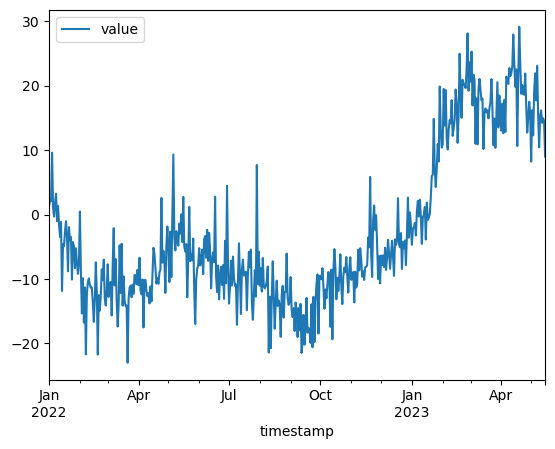

In [19]:
df.plot()

In [20]:
df['volatility'] = df['value'].rolling(window=10).std()

In [21]:
df

,value,volatility
timestamp,,
2022-01-01,1.422892,NaN
2022-01-02,2.144273,NaN
2022-01-03,2.084715,NaN
2022-01-04,9.615145,NaN
2022-01-05,1.115200,NaN
...,...,...
2023-05-11,16.167676,3.909508
2023-05-12,14.233566,3.990476
2023-05-13,14.959961,3.755386


In [23]:
df['target'] = 2 * df['volatility'] + np.random.normal(0, 0.5, size=n_points)

<Axes: xlabel='timestamp'>

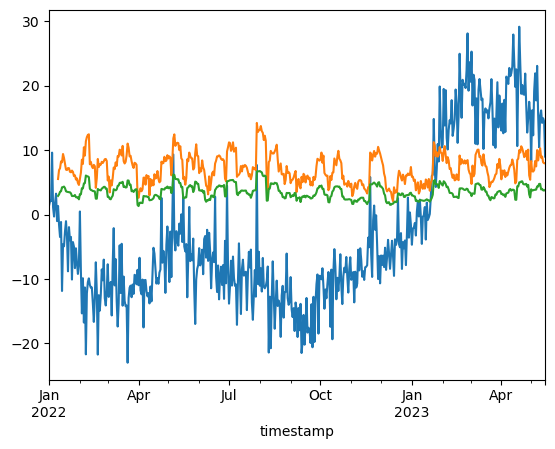

In [29]:
df['value'].plot()
df['target'].plot()
df['volatility'].plot()

<Axes: xlabel='timestamp'>

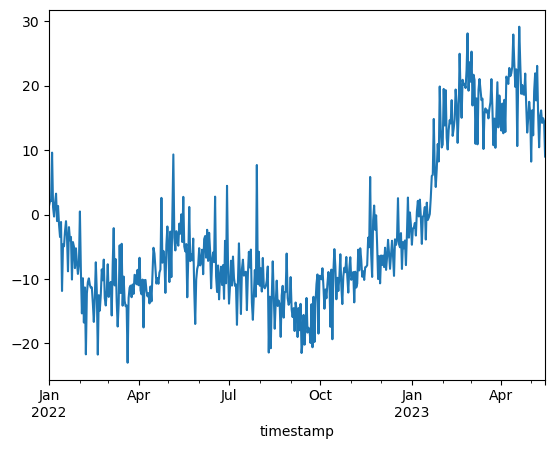

In [27]:
df['value'].plot()

<Axes: xlabel='timestamp'>

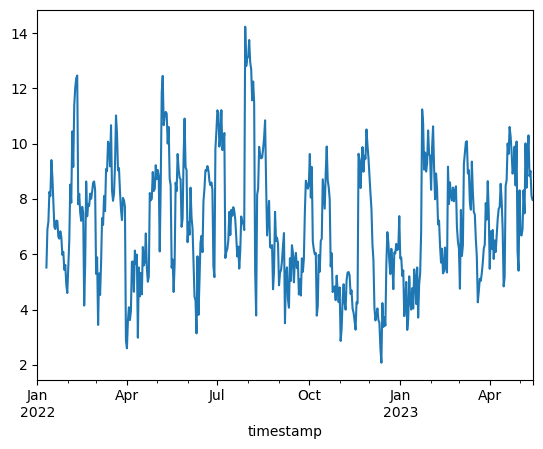

In [28]:
df['target'].plot()

In [9]:
df['target'] = 2 * df['volatility'] + np.random.normal(0, 0.5, size=n_points)

In [10]:
data = df.dropna()
X = data[['volatility']]
y = data['target']

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f'R² Score: {r2:.3f}')
print(f'Learned Coefficient: {model.coef_[0]:.3f}')

R² Score: 0.947
Learned Coefficient: 2.010


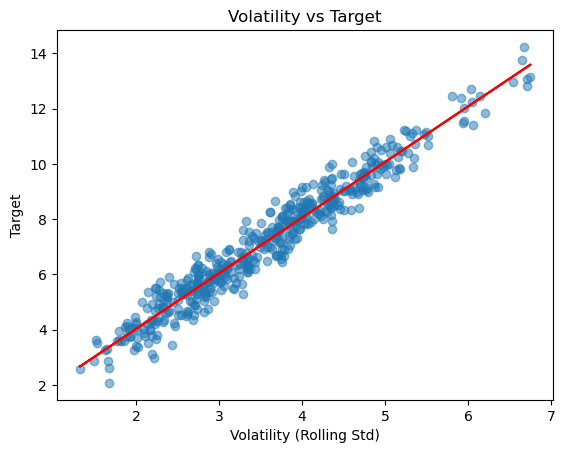

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X, y, alpha=0.5)
plt.plot(X, y_pred, color='red')
plt.xlabel('Volatility (Rolling Std)')
plt.ylabel('Target')
plt.title('Volatility vs Target')
plt.show()